# Skin Cancer Detection classifying Between Malignant and Benign

In [1]:
# Importing  Library 
import os
import glob
import shutil
import random
import pandas as pd
from PIL import Image
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# parameters to modify
ims1 = 224
tts = 0.25
hu = 500
rel = 0

In [3]:

def importing_data(path):
    sample = []
    for filename in glob.glob(path):
        img = Image.open(filename,'r')
        img = img.resize((ims1,ims1))
        img = np.array(img)
        IMG = img.ravel()
        sample.append(IMG)
    return sample


path1 = '//kaggle/input/skin-cancer-malignant-vs-benign/train/benign/*.jpg'
path2 = '//kaggle/input/skin-cancer-malignant-vs-benign/train/malignant/*.jpg'
path3 = '//kaggle/input/skin-cancer-malignant-vs-benign/test/benign/*.jpg'
path4 = '//kaggle/input/skin-cancer-malignant-vs-benign/test/malignant/*.jpg'

print("importing training benign")
train_b = importing_data(path1)
print("importing training malignant")
train_m = importing_data(path2)
print("importing testing benign")
test_b = importing_data(path3)
print("importing testing malignant")
test_m = importing_data(path4)

df_train_b = pd.DataFrame({'image':train_b, 'label': 'benign'})
df_train_m = pd.DataFrame({'image':train_m, 'label': 'malignant'})
df_test_b = pd.DataFrame({'image':test_b, 'label': 'benign'})
df_test_m = pd.DataFrame({'image':test_m, 'label': 'malignant'})

importing training benign
importing training malignant
importing testing benign
importing testing malignant


In [4]:
train_data = df_train_m.append(df_train_b,ignore_index=True)

test_data = df_test_m.append(df_test_b,ignore_index=True)

c = 1
igs = []
for i in range(len(train_data)):
    if(len(train_data.image[i])!=(3*ims1*ims1)):
#         print(c,i)
        c = c + 1
        igs.append(i)
print(igs)
print(len(igs))

[]
0


In [5]:
train_data=train_data.drop(igs,axis=0)
x_train = []
for tdim in train_data.image:
    x_train.append(tdim)
y_train = np.array(train_data.label)
y_traind = []
for i in range(len(y_train)):
    if(y_train[i]=="benign"):
        y_traind.append(0)
    else:
        y_traind.append(1)
print(len(y_traind))

2637


In [6]:
x_test = []
for tdim in test_data.image:
    x_test.append(tdim)
y_test = np.array(train_data.label)
y_testd = []
for i in range(len(y_train)):
    if(y_test[i]=="benign"):
        y_testd.append(0)
    else:
        y_testd.append(1)
print(len(y_testd))

2637


In [7]:
x_traind = np.array(x_train)
x_testd = np.array(x_test)
CLASSES = 2
y_train = np.zeros([len(y_traind), CLASSES])
for i in range(len(y_traind)):
        y_train[i][y_traind[i]] = 1
from sklearn.model_selection import train_test_split

# x_train, x_test, y_train, y_test = train_test_split(x_traind, y_train, test_size=tts)
# print('Train size: {train}, Test size: {test}'.format(train=len(x_train), test=len(x_test)))
x_train = x_traind
x_test = x_testd
y_train = y_traind
y_test = y_testd

In [8]:
x_train=np.matrix(x_train)
x_test=np.matrix(x_test)
y_train=np.matrix(y_train)
y_train = np.transpose(y_train)
y_test=np.matrix(y_test)
y_test = np.transpose(y_test)
INPUT_LENGHT = x_train.shape[1]
HIDDEN_UNITS = hu

Win = np.random.normal(size=[INPUT_LENGHT, HIDDEN_UNITS])
Win = np.matrix(Win)
print('Input Weight shape: {shape}'.format(shape=Win.shape))

Input Weight shape: (150528, 500)


In [9]:
def input_to_hidden(x):
    print(x.shape)
    print(Win.shape)
    a = np.dot(x, Win)
    a = np.maximum(a, rel, a) # ReLU
    return a
X = input_to_hidden(x_train)
Xt = np.transpose(X)

(2637, 150528)
(150528, 500)


In [10]:
www1 = np.dot(Xt, X)

b = np.identity(len(np.array(www1)))
b = np.dot(b,3)

www1 = www1 + b
ww1 = np.linalg.inv(www1)
ww2 = np.dot(Xt, y_train)

Wout = np.dot(ww1, ww2)
print('Output weights shape: {shape}'.format(shape=Wout.shape))

Output weights shape: (500, 1)


In [11]:
def predict(x):
    x = input_to_hidden(x)
    y = np.dot(x, Wout)
    return y
y = predict(x_test)
correct = 0
total = y.shape[0]
for i in range(total):
    predicted = np.argmax(y[i])
    test = np.argmax(y_test[i])
    correct = correct + (1 if predicted == test else 0)
print('Accuracy: {:f}'.format(correct*100/total))

(660, 150528)
(150528, 500)
Accuracy: 100.000000


# Testing Single Image 

In [12]:
pathcheck_b = '//kaggle/input/skin-cancer-malignant-vs-benign/test/benign/1034.jpg'
pathcheck_m = '//kaggle/input/skin-cancer-malignant-vs-benign/test/malignant/1019.jpg'

In [13]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random', 'test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [14]:
def showimagefile(path):
    for filename in glob.glob(path):
        img = mpimg.imread(filename)
        imgplot = plt.imshow(img)
        plt.show()

In [15]:
sb = np.array(importing_data(pathcheck_b))
sm = np.array(importing_data(pathcheck_m))

In [16]:
print(sb)
print(sm)

[[187 159 135 ... 192 161 141]]
[[139 113 138 ... 138 107 122]]


In [17]:
print(sb.shape)

(1, 150528)


In [18]:
print(sm.shape)

(1, 150528)


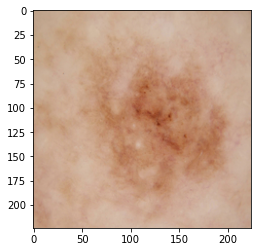

(1, 150528)
(150528, 500)
benign
[[0.68146335]]


In [19]:
showimagefile(pathcheck_b)
ans = predict(sb)
if ans >0.5:
    print("benign")
else:
    print("malignant")
print(ans)

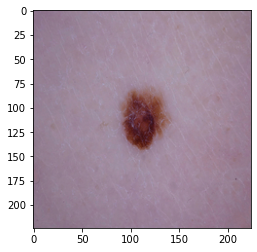

(1, 150528)
(150528, 500)
malignant
[[0.43541643]]


In [20]:
showimagefile(pathcheck_m)
ans = predict(sm)
if ans >0.5:
    print("benign")
else:
    print("malignant")
print(ans)